In [5]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
from copy import copy, deepcopy
from collections import defaultdict
from random import sample, randint
from busca.classes import ALTURAS, COLUNAS
from busca.classes.gerente import GerenteRemocao
from busca.classes.patio import Container, Pilha, Patio

from busca.utils import gera_agendamento_containers, gera_containers_transito
from busca.utils.simulador import Simulador


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
results = defaultdict(dict)
for perc in [.1, .3, .7]:
    simulador = Simulador()
    simulador.generate_env()
    for mode_out in ['nenhum', 'ordered', 'stay']:
        sub_results = defaultdict(list)
        for mode_in in ['like', 'nenhum']:
            for turns in [300]:
                for tamanho_fila in [10, 20, 30, 40, 50]:
                    lsimulador = deepcopy(simulador)
                    lsimulador.initialize_gerente(mode=mode_in)
                    lsimulador.turns = turns
                    lsimulador.tamanho_fila = tamanho_fila
                    media = lsimulador.run_monte_carlo(mode_in=mode_in)
                    sub_results[mode_in].append((turns, tamanho_fila, media))
        results[perc][mode_out] = sub_results

Modo like
Média de remoções: 0.5432500000000001
Total gatein: 2425 gateout:2425
Modo like
Média de remoções: 0.7978831269349843
Total gatein: 4428 gateout:4428
Modo like
Média de remoções: 1.553373322760678
Total gatein: 6301 gateout:6301
Modo like
Média de remoções: 3.8396129817004416
Total gatein: 10400 gateout:10400
Modo like
Média de remoções: 3.9959626986018058
Total gatein: 11467 gateout:11467
Modo nenhum
Média de remoções: 0.552898148148148
Total gatein: 2570 gateout:2570
Modo nenhum
Média de remoções: 1.5784242632725596
Total gatein: 4686 gateout:4686
Modo nenhum
Média de remoções: 2.1970820021613124
Total gatein: 6496 gateout:6496
Modo nenhum
Média de remoções: 2.68229480906416
Total gatein: 8599 gateout:8599
Modo nenhum
Média de remoções: 3.4571846182107153
Total gatein: 11134 gateout:11134
Modo like
Média de remoções: 0.42648148148148135
Total gatein: 2305 gateout:2305
Modo like
Média de remoções: 0.9940784457057682
Total gatein: 4515 gateout:4515
Modo like
Média de remoções

In [3]:
print(results)

defaultdict(<class 'dict'>, {0.1: {'nenhum': defaultdict(<class 'list'>, {'like': [(300, 10, 0.5432500000000001), (300, 20, 0.7978831269349843), (300, 30, 1.553373322760678), (300, 40, 3.8396129817004416), (300, 50, 3.9959626986018058)], 'nenhum': [(300, 10, 0.552898148148148), (300, 20, 1.5784242632725596), (300, 30, 2.1970820021613124), (300, 40, 2.68229480906416), (300, 50, 3.4571846182107153)]}), 'ordered': defaultdict(<class 'list'>, {'like': [(300, 10, 0.42648148148148135), (300, 20, 0.9940784457057682), (300, 30, 2.467559350015671), (300, 40, 2.669319588104419), (300, 50, 4.452577309186878)], 'nenhum': [(300, 10, 0.5781746031746032), (300, 20, 1.3982967406260745), (300, 30, 1.5850025322910373), (300, 40, 3.0755153415501715), (300, 50, 3.5443860384858863)]}), 'stay': defaultdict(<class 'list'>, {'like': [(300, 10, 0.4830462962962963), (300, 20, 1.0193637340901276), (300, 30, 2.061576532917913), (300, 40, 3.3083531947641864), (300, 50, 3.069526466674841)], 'nenhum': [(300, 10, 0.4

0.1 nenhum
0.1 ordered
0.1 stay
0.3 nenhum
0.3 ordered
0.3 stay
0.7 nenhum
0.7 ordered
0.7 stay


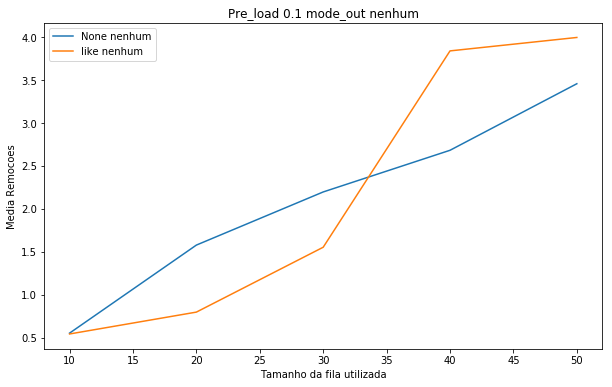

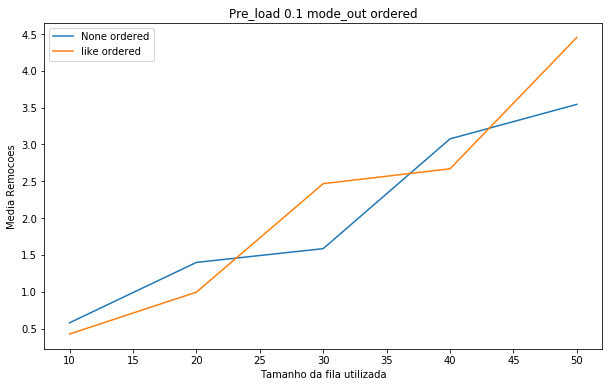

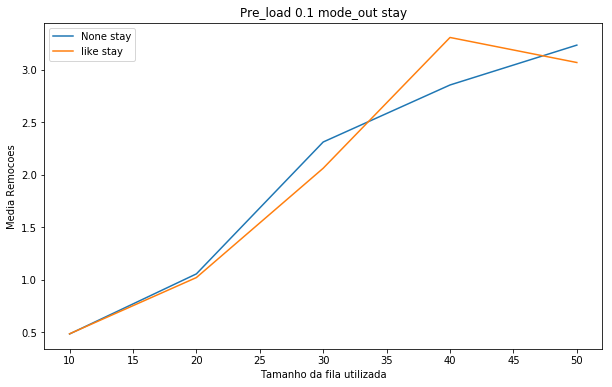

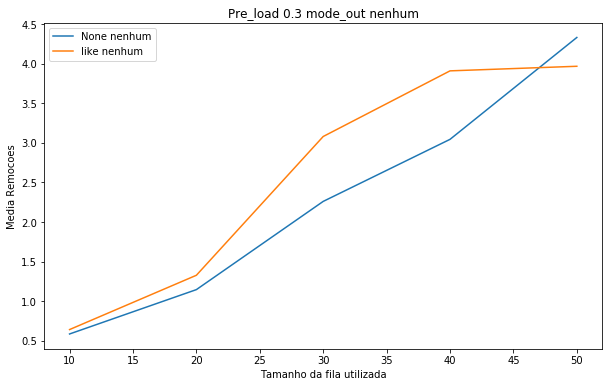

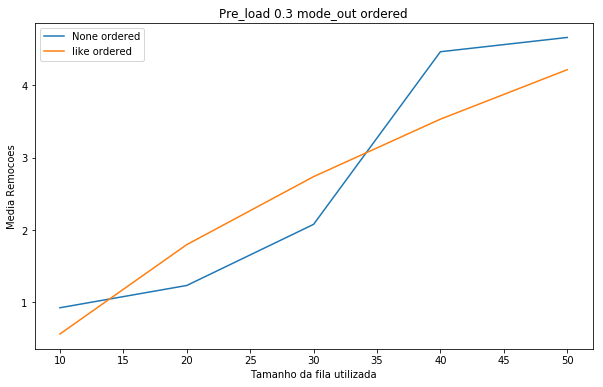

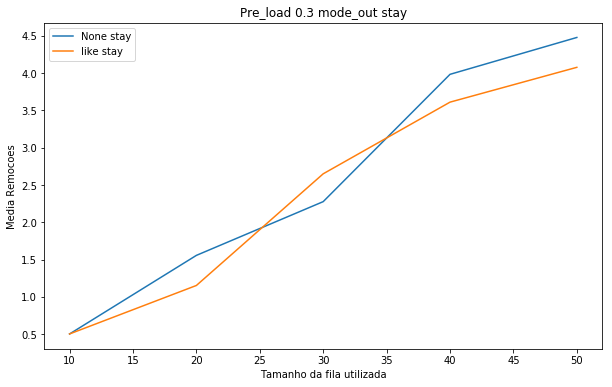

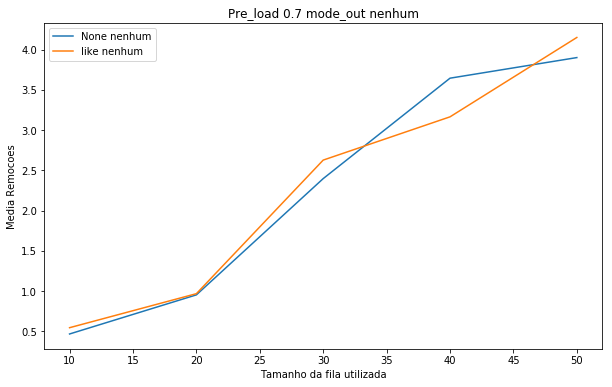

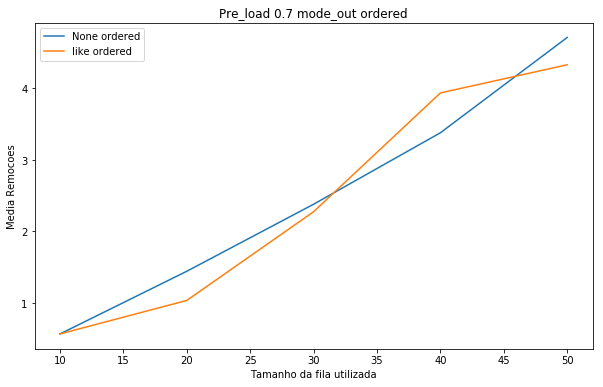

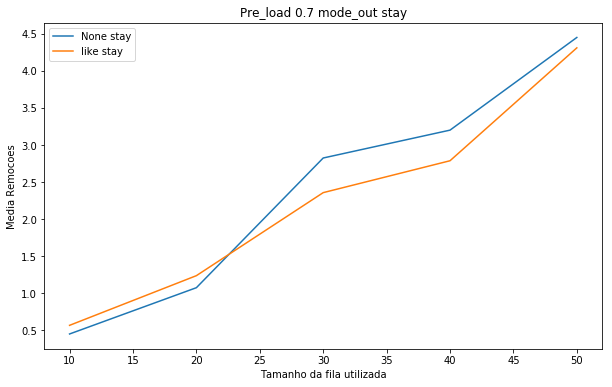

In [6]:
import matplotlib.pyplot as plt
for perc, values in results.items():
    for mode_out, sub_results in values.items():
        print(perc, mode_out)
        y_none = [x[2] for x in sub_results['nenhum']]
        y_like = [x[2] for x in sub_results['like']]
        x = [x[1] for x in sub_results['like']]
        fig = plt.figure(figsize=(10, 6))
        plt.title('Pre_load %s mode_out %s' % (perc, mode_out))
        plt.plot(x, y_none, label='None %s' % mode_out)
        plt.plot(x, y_like, label='like %s' % mode_out)
        plt.legend()
        plt.ylabel('Media Remocoes')
        plt.xlabel('Tamanho da fila utilizada')